Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "" # put your full name here
COLLABORATORS = [] # list anyone you collaborated with on this workbook

---

## Lab 3: Exploratory Data Analysis
**This lab was distributed Monday 9/16/2019 and should be completed by Monday 9/23/2019 at 11:59PM.**

-------------------------------------------

Welcome to your third lab of the semester!<br>

This lab aims to get you started with exploratory data analysis, including using `.count`, `.groupby`, understanding different file types, and performing basic plotting.

The data for this lab comes from the State of California's [domestic well groundwater monitoring program](https://data.ca.gov/dataset/ground-water-water-quality-results). In California, up to [2 million people get their water from a private domestic well](https://www.waterboards.ca.gov/gama/docs/wellowner_guide.pdf) as opposed to a public water system. For this lab, we've taken the water monitoring dataset and made some modifications for educational purposes, including splitting the dataset to merge later.

## Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Question 1: Understanding the data
### Question 1.1
What sort of files are `gama_wells.txt`, `gama_measurements.csv`? Describe the difference between these two files. You can inspect the files in a text editor to answer this question.

gama_wells is a tab-separated file (each new entry in a given row is separated by a tab), while gama_measurements is a comma-separated file (each new entry in a given row is separated by a comma).

### Question 1.2
Load gama_wells.txt into dataframe `wells`, and gama_measurements.csv into dataframe `measurements`. You should use the pandas functions for [reading .csv files](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) and [reading .txt files](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_table.html).

In [3]:
wells = pd.read_table('data/gama_wells.txt', sep = '\t')
measurements = pd.read_csv('data/gama_measurements.csv')

In [4]:
wells.head()

,WELL_ID,WELL_TYPE,WELL_DEPTH_FT,APPROXIMATE_LATITUDE,APPROXIMATE_LONGITUDE,TOP_OF_SCREEN_FT,SCREEN_LENGTH_FT,SOURCE,SOURCE_NAME,OTHER_NAMES
0,ANT-07,MUNICIPAL,527.0,34.835000,-118.215833,0.0,0.0,USGS,ANT-07,ANT-07
1,ANT-U,MUNICIPAL,700.0,34.690131,-118.133694,235.0,458.0,USGS,ANT-U,ANT-U
2,ANT-08,MUNICIPAL,500.0,34.719417,-118.292500,0.0,0.0,USGS,ANT-08,ANT-08
3,ANT-12,MUNICIPAL,1200.0,34.664500,-118.072806,0.0,0.0,USGS,ANT-12,ANT-12
4,ANT-17,MUNICIPAL,552.0,34.688872,-118.137139,0.0,0.0,USGS,ANT-17,ANT-17


In [5]:
measurements.head()

,WELL_ID,RESULTS,CHEMICAL,DATE,UNITS,QUALIFER,RL
0,ANT-07,0.073,BR,1/29/2008,MG/L,NaN,0.02
1,ANT-07,0.100,CDS,1/29/2008,UG/L,<,0.06
2,ANT-07,0.060,DCA12,1/29/2008,UG/L,<,0.06
3,ANT-07,2.000,I,1/29/2008,UG/L,<,0.002
4,ANT-07,6.790,MO,1/29/2008,UG/L,NaN,0.2


### Question 1.3
How many rows are in `wells`? How about `measurements`?

In [6]:
wells.shape # 4034 rows

(4034, 10)

In [7]:
measurements.shape # 522615 rows

(522615, 7)

### Question 1.4

What does each row of `wells` represent? How about each row of `measurements`?

Each row of `wells` represents an individual well and its associated characteristics. Each row of `measurements` represents a well testing measurement that's specific to a well, date, and chemical substance.

### Question 1.5
Check out the documentation for this dataset provided by the [California Data Portal](https://data.ca.gov/dataset/ground-water-water-quality-results) by clicking on "Data Dictionary". Are there any fields in either `wells` or `measurements` that are not documented or easily understandable from looking at the data dictionary?

The field "RL" in `measurements` doesn't appear in the data dictionary, although some additional googling shows that it stands for "reporting limit", or the lowest detectable concentration for that chemical and sensor. Some other fields, like "SCREEN_LENGTH_FT", also don't appear, although those are slightly more self-explanatory.

## Question 2: Merging data
For this question, we want to use the method [`.merge()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) to merge `wells` and `measurements`.<br>
When you use `.merge()`, there are a few fields that you'll have to populate. The `DataFrame` in `DataFrame.merge()` is considered your left dataframe, or the set of data that will show up on the left side of your merged dataframe. The `right` field will contain your right dataframe (the set of data that will show up on the right side of your merged dataframe).<br>
Two of the key fields that you'll have to fill out are `on = ` (the common field that both tables should be matched on when  you merge) and ` how = ` (the type of merge that you want to perform).<br>
A visual of the different types of merges is shown below ([source](http://www.datasciencemadesimple.com/join-merge-data-frames-pandas-python/)).<br>
<img src="images/joins.png"><br>
An inner merge retains only the records that both tables have in common, an outer merge keeps all records from both tables and fills in `NaN` values for non-overlapping records, and a right merge and a left merge keep all the records from the right or left table, respectively, filling in `NaN` if a particular record is not found in the other table.

### Question 2.1
If we want to link the well measurements in `measurement` to the well characteristics in `wells`, what field do we want to use for `on = `?

We want to merge on "WELL_ID", which will allow us to link measurements to well characteristics.

### Question 2.2
Will using an inner, outer, right, or left merge change the number of records or number of missing values in our final merged dataset? Feel free to try the different options to see what results. Why or why not? Under what conditions would your choice of merge type (inner, outer, right, or left) matter? 

In [8]:
# use this cell for scratch work

No - no matter what, we still get 522,615 records. That's because there's perfect overlap between `measurements` and `wells`. If there wasn't - eg. some of the records in `measurements` were associated with wells that weren't found in `wells` - then our choice of merge type would matter. For instance, the example I just mentioned would lead to less records using an inner merge than an outer merge.

### Question 2.3
Merge `measurements` and `wells`, keeping `measurements` as the left dataframe. Save the merged dataframe to `measurements_wells`.

In [9]:
measurements_wells = measurements.merge(wells, on = "WELL_ID", how = "inner")

In [10]:
measurements_wells.head()

,WELL_ID,RESULTS,CHEMICAL,DATE,UNITS,QUALIFER,RL,WELL_TYPE,WELL_DEPTH_FT,APPROXIMATE_LATITUDE,APPROXIMATE_LONGITUDE,TOP_OF_SCREEN_FT,SCREEN_LENGTH_FT,SOURCE,SOURCE_NAME,OTHER_NAMES
0,ANT-07,0.073,BR,1/29/2008,MG/L,NaN,0.02,MUNICIPAL,527.0,34.835,-118.215833,0.0,0.0,USGS,ANT-07,ANT-07
1,ANT-07,0.100,CDS,1/29/2008,UG/L,<,0.06,MUNICIPAL,527.0,34.835,-118.215833,0.0,0.0,USGS,ANT-07,ANT-07
2,ANT-07,0.060,DCA12,1/29/2008,UG/L,<,0.06,MUNICIPAL,527.0,34.835,-118.215833,0.0,0.0,USGS,ANT-07,ANT-07
3,ANT-07,2.000,I,1/29/2008,UG/L,<,0.002,MUNICIPAL,527.0,34.835,-118.215833,0.0,0.0,USGS,ANT-07,ANT-07
4,ANT-07,6.790,MO,1/29/2008,UG/L,NaN,0.2,MUNICIPAL,527.0,34.835,-118.215833,0.0,0.0,USGS,ANT-07,ANT-07


## Question 3: Groupby

### Question 3.1 
Group `measurements_wells` by "WELL_TYPE", outputting a table that shows the counts of the variables "RESULTS" and "QUALIFER" grouped by "WELL_TYPE". Here, you'll want to use [`.groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and `.count()`.

In [11]:
measurements_wells[["RESULTS", "QUALIFER"]].groupby(measurements_wells['WELL_TYPE']).count()

,RESULTS,QUALIFER
WELL_TYPE,,
DOMESTIC,98752,100647
MUNICIPAL,420886,311508


### Question 3.2
Does groupby count NaNs? You can check by using the methods [`.isna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html) and `.sum`.

In [12]:
measurements_wells["QUALIFER"].isna().sum()

110460

There are about 411,000 counted values in the groupby result in question 3.1, and 110,460 NAs in "QUALIFER" according to the code above. We know that there are 522, 615 records in total, which means that groupby does **not** count NAs.

### Question 3.3
Find the average "RESULTS" value for arsenic (AS) measurements, grouped by "WELL_TYPE".

In [13]:
arsenic = measurements_wells[measurements_wells["CHEMICAL"] == "AS"]
arsenic["RESULTS"].groupby(arsenic["WELL_TYPE"]).mean()

WELL_TYPE
DOMESTIC     2.852685
MUNICIPAL    5.345434
Name: RESULTS, dtype: float64

## Question 4: Plotting
Now, lets do some basic plotting. According to the [Center for Disease Control and Prevention, shallower wells are more vulnerable to nitrate contamination from fertilizer, waste, or other sources](https://www.cdc.gov/healthywater/drinking/private/wells/disease/nitrate.html). Let's explore this relationship by first creating a dataframe called `nitrate` that contains only the records that measure nitrate concentrations (NO3N). Then, use [`plt.scatter()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html) to create a scatter plot. You only need to fill in the x and y values by referencing the corresponding column in `nitrate`. Fill in the rest of the functions in the cell below to give the plot an appropriate title and x and y axis labels. Make sure to include units in your axis labels (you can inspect `nitrate` to find the appropriate units).

In [14]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Nitrate concentration (MG/L)')

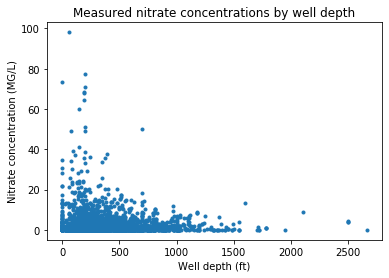

In [15]:
nitrate = measurements_wells[measurements_wells["CHEMICAL"] == "NO3N"]

plt.scatter(nitrate["WELL_DEPTH_FT"], nitrate["RESULTS"], marker = '.')
plt.title("Measured nitrate concentrations by well depth")
plt.xlabel("Well depth (ft)")
plt.ylabel("Nitrate concentration (MG/L)")

# Hooray, you're done! 

Please remember to submit your lab work, after running all cells, in .html and .ipynb format on bCourses.